# Kalman Filter Model

Team META
* Akhilesh Dongre
* Krishnanand Jha
* Janhvi Shah
* Manav Malavia
* Jaimeen Unagar



- An algorithm that provides estimates of some unknown variables given the **measurements observed over time**
- The Kalman filter process has two steps: the **prediction step**, where the next state
of the system is predicted given the previous measurements, and the **update step**,
where the current state of the system is estimated given the measurement at that
time
- A predictor-corrector type estimator that is optimal in the sense that it minimizes
the estimated error covariance when some presumed conditions are met

### Importing required libraries

In [ ]:
!pip install arch

ERROR: Could not find a version that satisfies the requirement arch_model (from versions: none)
ERROR: No matching distribution found for arch_model
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 14.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from math import sqrt
from datetime import datetime
import datetime
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
from math import sqrt
from arch import arch_model
import itertools
import statsmodels.api as sm


# extract data from various Internet sources into a pandas DataFrame
import pandas_datareader as web

### Importing Meta data

In [ ]:
#start = datetime.datetime(202, 1, 1)
#end = datetime.datetime(2023, 1, 1)

df_meta = pd.read_csv("META_feature_mart (3).csv")

df_meta

,Unnamed: 0,Date,Mkt-RF,SMB,HML,RMW,CMA,RF,ADS_Index,SP500,...,Trend_AroonIndicator,Trend_CCI,Trend_DPO,Trend_EMA,Volumne_CMF,Volumne_EOM,Volumne_FI,Volatility_ATR,Volatility_BB,Volatility_DonchainChannel
0,0,2022-01-03,0.73,0.43,0.78,-1.17,0.60,0.000,-0.457452,4796.56,...,15.418327,23.678581,-0.315160,222.209561,0.012340,4.278403,-2.344605e+07,0.000000,20.717792,20.204587
1,1,2022-01-04,-0.29,-0.07,3.62,0.63,1.47,0.000,-0.470161,4793.54,...,15.418327,23.678581,-0.315160,222.209561,0.012340,-116.071311,-2.344605e+07,0.000000,20.717792,20.204587
2,2,2022-01-05,-2.28,-0.94,2.60,1.41,1.22,0.000,-0.480353,4700.58,...,15.418327,23.678581,-0.315160,222.209561,0.012340,-445.163344,-2.344605e+07,0.000000,20.717792,20.204587
3,3,2022-01-06,0.00,0.38,1.75,-0.55,-0.02,0.000,-0.488034,4696.05,...,15.418327,23.678581,-0.315160,222.209561,0.012340,67.358542,-2.344605e+07,0.000000,20.717792,20.204587
4,4,2022-01-07,-0.48,-0.96,2.02,-0.12,0.85,0.000,-0.493205,4677.03,...,15.418327,23.678581,-0.315160,222.209561,0.012340,110.034986,-2.344605e+07,0.000000,20.717792,20.204587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,517,2024-01-25,0.46,0.20,0.56,-0.19,0.55,0.022,-0.387875,4894.16,...,80.000000,133.859944,-9.416508,369.700059,0.143397,-91.518306,4.361165e+07,8.290524,15.944191,15.303399
518,518,2024-01-26,-0.02,0.35,-0.27,0.22,-0.02,0.022,-0.377156,4890.97,...,85.000000,129.982282,1.807999,372.027674,0.127338,142.802348,4.066172e+07,8.135998,16.938190,15.401641
519,519,2024-01-29,0.85,0.89,-0.59,-1.13,-0.31,0.022,-0.338559,4927.93,...,90.000000,133.397660,-1.126988,374.788847,0.187458,200.612881,4.906987e+07,8.220698,18.248368,16.968849
520,520,2024-01-30,-0.13,-0.96,0.84,1.00,0.13,0.022,-0.324465,4924.97,...,90.000000,128.885460,1.387988,377.195623,0.158493,180.558218,4.269465e+07,8.149162,18.860406,17.783334


In [ ]:
columns_to_drop = ['Unnamed: 0', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'ADS_Index',
       'SP500', 'T10Y3M', 'OBMMIJUMBO30YF', 'DEXUSEU', 'DEXJPUS', 'DEXUSUK',
       'CBBTCUSD', 'CBETHUSD', 'T10YIE', 'DCOILBRENTEU', 'VIXCLS', 'DAAA',
       'DBAA', 'NIKKEI225', 'AMERIBOR', 'T5YIE', 'BAMLH0A0HYM2',
       'BAMLH0A0HYM2EY', 'DGS10', 'DGS1', 'RIFSPPFAAD90NB', 'DCPN3M', 'DCPF1M',
       'DCOILWTICO', 'DHHNGSP', 'USRECD', 'USRECDM', 'USRECDP','Date.1']

# Use the drop method to remove the specified columns
df_meta = df_meta.drop(columns=columns_to_drop)

In [ ]:
df_meta.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Returns', 'Daily_Return', 'Typical_Price', 'Typical_Price_Return',
       'Volume_Log', 'Volume_Differencing', 'Volume_Differencing_10',
       'Volumne_Percent_Change', 'MA_5', 'Volumne_MA_200', 'Close_EMA_50',
       'Momentum_AwesomeOscillatorIndicator', 'Momentum_KAMA',
       'Momentum_PercentagePVolumneOscillator', 'Trend_ADX',
       'Trend_AroonIndicator', 'Trend_CCI', 'Trend_DPO', 'Trend_EMA',
       'Volumne_CMF', 'Volumne_EOM', 'Volumne_FI', 'Volatility_ATR',
       'Volatility_BB', 'Volatility_DonchainChannel'],
      dtype='object')

In [ ]:
df_meta = df_meta.set_index('Date')

In [ ]:
df_meta

,Open,High,Low,Close,Adj Close,Volume,Returns,Daily_Return,Typical_Price,Typical_Price_Return,...,Trend_AroonIndicator,Trend_CCI,Trend_DPO,Trend_EMA,Volumne_CMF,Volumne_EOM,Volumne_FI,Volatility_ATR,Volatility_BB,Volatility_DonchainChannel
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-03,338.299988,341.079987,337.190002,338.540009,338.181183,14537900,0.098935,0.000272,338.936666,0.027793,...,15.418327,23.678581,-0.315160,222.209561,0.012340,4.278403,-2.344605e+07,0.000000,20.717792,20.204587
2022-01-04,339.950012,343.089996,331.869995,336.529999,336.173309,15998000,-2.007874,-0.005955,337.163330,-0.524579,...,15.418327,23.678581,-0.315160,222.209561,0.012340,-116.071311,-2.344605e+07,0.000000,20.717792,20.204587
2022-01-05,333.019989,335.760010,323.839996,324.170013,323.826416,20564500,-12.346893,-0.037419,327.923340,-2.778761,...,15.418327,23.678581,-0.315160,222.209561,0.012340,-445.163344,-2.344605e+07,0.000000,20.717792,20.204587
2022-01-06,322.820007,339.170013,322.720001,332.459991,332.107635,27962800,8.281219,0.025252,331.450002,1.069711,...,15.418327,23.678581,-0.315160,222.209561,0.012340,67.358542,-2.344605e+07,0.000000,20.717792,20.204587
2022-01-07,332.739990,337.000000,328.880005,331.790009,331.438354,14722000,-0.669281,-0.002017,332.556671,0.333331,...,15.418327,23.678581,-0.315160,222.209561,0.012340,110.034986,-2.344605e+07,0.000000,20.717792,20.204587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,390.170013,395.489990,385.660004,393.179993,392.763275,15091100,2.477356,0.006327,391.443329,-0.028099,...,80.000000,133.859944,-9.416508,369.700059,0.143397,-91.518306,4.361165e+07,8.290524,15.944191,15.303399
2024-01-26,394.350006,396.790009,391.589996,394.140015,393.722260,13163700,0.958984,0.002439,394.173340,0.695001,...,85.000000,129.982282,1.807999,372.027674,0.127338,142.802348,4.066172e+07,8.135998,16.938190,15.401641
2024-01-29,394.989990,402.929993,393.100006,401.019989,400.594940,18742400,6.872681,0.017305,399.016663,1.221242,...,90.000000,133.397660,-1.126988,374.788847,0.187458,200.612881,4.906987e+07,8.220698,18.248368,16.968849


In [ ]:
df_meta.describe()

,Open,High,Low,Close,Adj Close,Volume,Returns,Daily_Return,Typical_Price,Typical_Price_Return,...,Trend_AroonIndicator,Trend_CCI,Trend_DPO,Trend_EMA,Volumne_CMF,Volumne_EOM,Volumne_FI,Volatility_ATR,Volatility_BB,Volatility_DonchainChannel
count,522.000000,522.000000,522.000000,522.000000,522.000000,5.220000e+02,522.000000,522.000000,522.000000,522.000000,...,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,5.220000e+02,522.000000,522.000000,522.000000
mean,226.601935,230.386322,223.353832,226.887663,226.647187,2.935959e+07,0.098935,0.000272,226.875939,0.027793,...,15.418327,23.678581,-0.315160,222.209561,0.012340,4.278403,-2.344605e+07,7.641236,20.717792,20.204587
std,77.086239,77.642997,76.421884,77.145258,77.063492,1.986907e+07,7.051942,0.034112,77.051304,3.054253,...,64.504789,109.608807,8.917697,71.341649,0.145497,156.060138,1.949365e+08,2.408382,12.701199,9.683251
min,90.080002,90.459999,88.089996,88.910004,88.815765,5.467500e+06,-85.149658,-0.306391,89.260002,-29.375155,...,-100.000000,-421.629380,-24.670504,109.753838,-0.312147,-643.957384,-1.509290e+09,0.000000,5.075582,8.217073
25%,166.209999,169.532497,162.040005,165.682499,165.506893,1.900470e+07,-2.677132,-0.012968,165.251666,-1.185824,...,-50.000000,-56.707438,-5.194998,167.676038,-0.089686,-57.819681,-2.344605e+07,6.371772,12.719300,14.011392
50%,210.584999,214.435005,207.860001,211.485001,211.260849,2.435060e+07,0.124855,0.000683,211.561668,0.141280,...,25.000000,30.847853,-0.315160,210.932513,0.012331,5.061914,5.920621e+06,7.857999,16.934804,17.026221
75%,300.387512,305.992508,296.839989,300.194992,299.876831,3.326955e+07,3.476315,0.015466,301.214994,1.327597,...,75.000000,110.141302,4.054759,296.522189,0.131427,74.867452,3.705653e+07,8.891614,22.850809,23.311671
max,403.589996,406.359985,399.570007,401.019989,400.594940,2.323166e+08,35.612228,0.209307,401.996663,22.118468,...,100.000000,391.584457,61.960999,378.428422,0.359217,609.525146,5.607092e+08,15.315433,68.692469,62.162326


- The **high**, **low** refers to the maximum and the minimum prices in a given time period.
- **Open** and **Close** at which a stock began and ended trading in the same period.
- **Volume** is the total amount of trading activity. Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.

In [ ]:
def Kalman_Filter(Y):
    S = Y.shape[0]
    S = S + 1
    "Initialize Params:"
    Z = param0[0]
    T = param0[1]
    H = param0[2]
    Q = param0[3]
    # "Kalman Filter Starts:"
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)
    v = np.zeros(S)
    F = np.zeros(S)
    KF_Dens = np.zeros(S)
    for s in range(1,S):
        if s == 1:
            P_update[s] = 1000
            P_predict[s] =  T*P_update[1]*np.transpose(T)+Q
        else:
            F[s]= Z*P_predict[s-1]*np.transpose(Z)+H
            v[s] = Y[s-1] - Z*u_predict[s-1]
            u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_predict[s];
            P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1]
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q
            Likelihood = np.sum(KF_Dens[1:-1])
            return Likelihood

In [ ]:
def Kalman_Smoother(params, Y):
    S = Y.shape[0]
    S = S + 1
    "Initialize Params:"
    Z = params[0]
    T = params[1]
    H = params[2]
    Q = params[3]
    "Kalman Filter Starts:"
    u_predict = np.zeros(S)
    u_update = np.zeros(S)
    P_predict = np.zeros(S)
    P_update = np.zeros(S)
    v = np.zeros(S)
    F = np.zeros(S)
    for s in range(1,S):
        if s == 1:
            P_update[s] = 1000
            P_predict[s] =  T*P_update[1]*np.transpose(T)+Q
        else:
            # "Please fill this part."
            F[s]= Z*P_predict[s-1]*np.transpose(Z)+H
            v[s] = Y[s-1] - Z*u_predict[s-1]
            u_update[s] = u_predict[s-1]+P_predict[s-1]*np.transpose(Z)*(1/F[s])*v[s]
            u_predict[s] = T*u_predict[s];
            P_update[s] = P_predict[s-1]-P_predict[s-1]*np.transpose(Z)*(1/F[s])*Z*P_predict[s-1]
            P_predict[s] = T*P_update[s]*np.transpose(T)+Q


            u_smooth = np.zeros(S)
            P_smooth = np.zeros(S)
            u_smooth[S-1] = u_update[S-1]
            P_smooth[S-1] = P_update[S-1]
    for  t in range(S-1,0,-1):

        u_smooth[t-1] = u_update[t] +P_update[t]*np.transpose(T)/P_predict[t]*(u_smooth[t]- T*u_update[t])
        P_smooth[t-1] = P_update[t] + (P_update[t]*np.transpose(T)/P_predict[t]*(P_smooth[t]-P_update[t])/P_update[t]*T*P_update[t])

    u_smooth = u_smooth[0:-1]
    return u_smooth

### On Open Price

<ipython-input-37-c5b5f1e8d3b5>:7: OptimizeWarning: Unknown solver options: xtol
  param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 5
         Gradient evaluations: 1


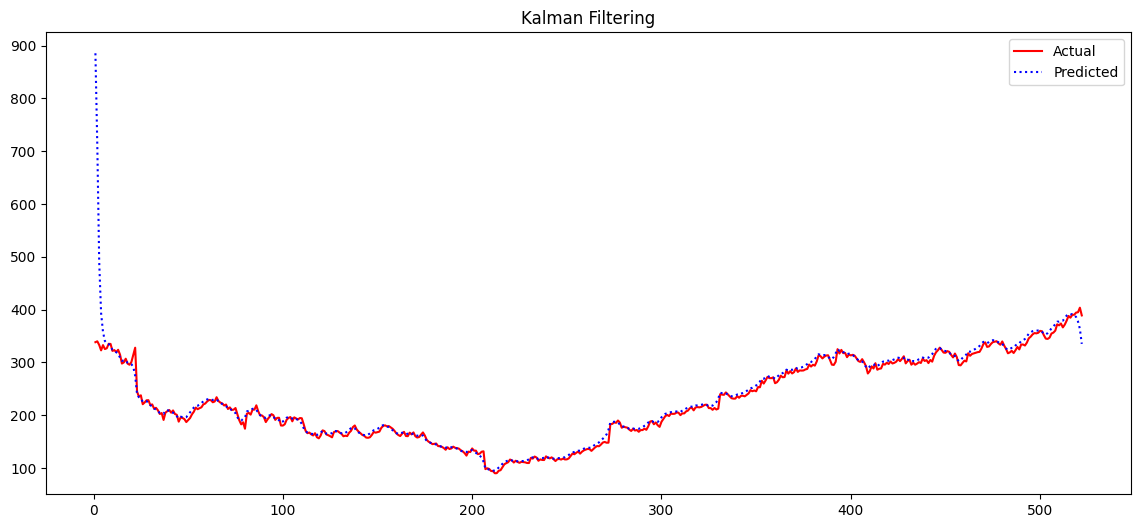

In [ ]:
Y = df_meta['Open']
T = Y.shape[0]
mu = 1196;


param0 = np.array([0.3, 0.8, 0.95,1.6])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x, Y)

timevec = np.linspace(1,T,T)


fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, u,'b:', label='Predicted')
plt.legend(loc='upper right')
plt.title("Kalman Filtering")
plt.show()

## On Close Price

<ipython-input-38-93c9e1e43e42>:7: OptimizeWarning: Unknown solver options: xtol
  param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 5
         Gradient evaluations: 1


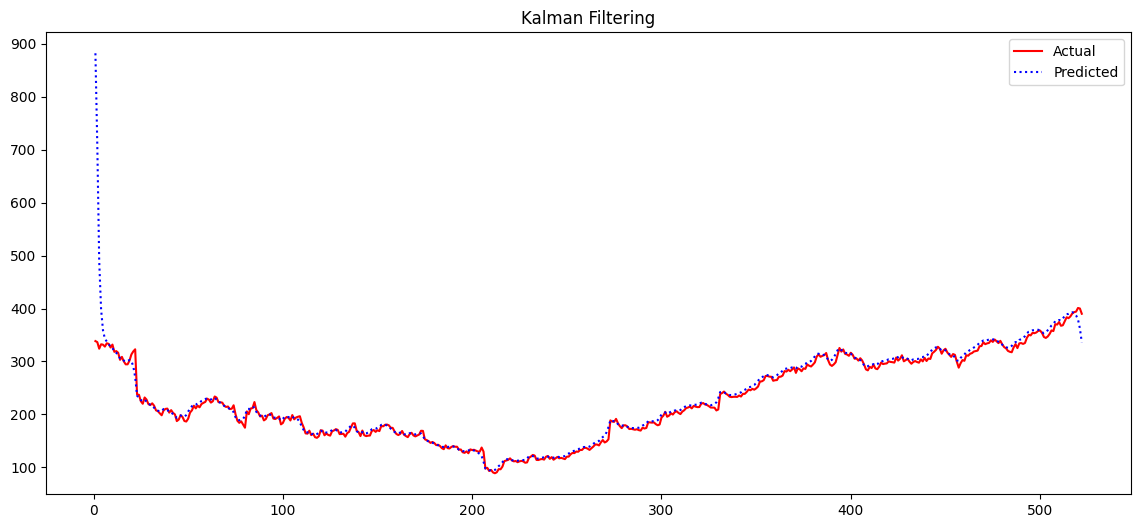

In [ ]:
Y = df_meta['Close']
T = Y.shape[0]
mu = 1196;


param0 = np.array([0.3, 0.8, 0.95,1.6])
param_star = minimize(Kalman_Filter, param0, method='BFGS', options={'xtol': 1e-8, 'disp': True})
u = Kalman_Smoother(param_star.x, Y)

timevec = np.linspace(1,T,T)


fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, u,'b:', label='Predicted')
plt.legend(loc='upper right')
plt.title("Kalman Filtering")
plt.show()

In [ ]:
results = pd.DataFrame({'Actual': list(Y),
                  'Predicted' : list(u),
                  #'Date':df_meta['Date'],
                  'Open':df_meta['Open'],
                  'Close':df_meta['Close']
                       })

In [ ]:
#results.set_index('Date',inplace = True)
results.head(10)

,Actual,Predicted,Open,Close
Date,,,,
2022-01-03,338.540009,881.970892,338.299988,338.540009
2022-01-04,336.529999,707.340655,339.950012,336.529999
2022-01-05,324.170013,489.554629,333.019989,324.170013
2022-01-06,332.459991,398.396886,322.820007,332.459991
2022-01-07,331.790009,358.852948,332.739990,331.790009
2022-01-10,328.070007,342.755866,325.309998,328.070007
2022-01-11,334.369995,337.690480,326.779999,334.369995
2022-01-12,333.260010,332.649162,335.179993,333.260010
2022-01-13,326.480011,327.921086,334.980011,326.480011


In [ ]:
results.tail(10)

,Actual,Predicted,Open,Close
Date,,,,
2024-01-18,376.130005,386.127497,371.489990,376.130005
2024-01-19,383.450012,389.334951,379.000000,383.450012
2024-01-22,381.779999,389.919197,387.950012,381.779999
2024-01-23,385.200012,391.922484,384.619995,385.200012
2024-01-24,390.700012,393.014878,390.000000,390.700012
2024-01-25,393.179993,391.314733,390.170013,393.179993
2024-01-26,394.140015,386.988186,394.350006,394.140015
2024-01-29,401.019989,379.357566,394.989990,401.019989
2024-01-30,400.059998,362.623754,403.589996,400.059998


In [ ]:
dif = pd.DataFrame({'Actual':list(Y),
                     'Predicted':list(u)})

In [ ]:
dif.head(20)

,Actual,Predicted
0,338.540009,881.970892
1,336.529999,707.340655
2,324.170013,489.554629
3,332.459991,398.396886
4,331.790009,358.852948
5,328.070007,342.755866
6,334.369995,337.690480
7,333.260010,332.649162
8,326.480011,327.921086
9,331.899994,325.567887


# GARCH Filter

In [ ]:
# Calculate daily returns
df_meta['Returns'] = df_meta['Adj Close'].pct_change().dropna()
returns = df_meta['Returns'].dropna()


In [ ]:
returns

Date
2022-01-04   -0.005937
2022-01-05   -0.036728
2022-01-06    0.025573
2022-01-07   -0.002015
2022-01-10   -0.011212
                ...   
2024-01-25    0.006348
2024-01-26    0.002442
2024-01-29    0.017456
2024-01-30   -0.002394
2024-01-31   -0.024796
Name: Returns, Length: 521, dtype: float64

In [ ]:
returns.index = pd.to_datetime(returns.index)

In [ ]:
# Specify and fit the GARCH(1, 1) model
model = arch_model(returns, vol='Garch', p=1, q=1)
result = model.fit()

# Display the model summary
print(result.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6067503.56065688
Iteration:      2,   Func. Count:     17,   Neg. LLF: 343199725896287.25
Iteration:      3,   Func. Count:     28,   Neg. LLF: 374082418.47831833
Iteration:      4,   Func. Count:     41,   Neg. LLF: 1037930850.8442909
Iteration:      5,   Func. Count:     55,   Neg. LLF: -1044.104648066877
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1044.1046585336576
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 5
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                1044.10
Distribution:                  Normal   AIC:                          -2080.21
Method:            Maximum Likeli

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001112. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
best_aic = np.inf
best_order = None
best_model = None

for p, q in itertools.product(range(6), range(6)):
    if p + q > 0:  # Skip (0, 0) order
        try:
            model = arch_model(returns, vol='Garch', p=p, q=q)
            results = model.fit()
            aic = results.aic
            if aic < best_aic:
                best_aic = aic
                best_order = (p, q)
                best_model = results
        except ValueError:
            continue

print(f'Best Order: {best_order}, AIC: {best_aic}')
print(best_model.summary())


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001112. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001112. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      5,   Neg. LLF: 9791000.153119585
Iteration:      2,   Func. Count:     14,   Neg. LLF: -997.2351772014994
Optimization terminated successfully    (Exit mode 0)
            Current function value: -997.2351756343339
            Iterations: 6
            Function evaluations: 14
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      6,   Neg. LLF: 6067503.56065688
Iteration:      2,   Func. Count:     17,   Neg. LLF: 343199725896287.25
Iteration:      3,   Func. Count:     28,   Neg. LLF: 374082418.47831833
Iteration:      4,   Func. Count:     41,   Neg. LLF: 1037930850.8442909
Iteration:      5,   Func. Count:     55,   Neg. LLF: -1044.104648066877
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1044.1046585336576
            Iterations: 9
            Function evaluations: 55
            Gradient evaluations: 5


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001112. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001112. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

Iteration:      1,   Func. Count:      7,   Neg. LLF: 5214207.173554897
Iteration:      2,   Func. Count:     19,   Neg. LLF: 3076112543.3966246
Iteration:      3,   Func. Count:     32,   Neg. LLF: -1045.9857571212065
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1045.9857740996497
            Iterations: 7
            Function evaluations: 32
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      8,   Neg. LLF: 94182078978.9671
Iteration:      2,   Func. Count:     20,   Neg. LLF: -1049.0125472816048
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1049.0125465444378
            Iterations: 6
            Function evaluations: 20
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      9,   Neg. LLF: 29971445.443589225
Iteration:      2,   Func. Count:     23,   Neg. LLF: 31725151.578397192
Iteration:      3,   Func. Count:     38,   Neg. LLF: -1052.791963964324

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001112. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      2,   Func. Count:     25,   Neg. LLF: 221912208.1110542
Iteration:      3,   Func. Count:     42,   Neg. LLF: 3667723608556.11
Iteration:      4,   Func. Count:     55,   Neg. LLF: 1305059.9548615478
Iteration:      5,   Func. Count:     70,   Neg. LLF: 8001774636.538018
Iteration:      6,   Func. Count:     87,   Neg. LLF: 5969088555.019781
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1054.6554119636116
            Iterations: 8
            Function evaluations: 97
            Gradient evaluations: 6
Iteration:      1,   Func. Count:      6,   Neg. LLF: 89781442.1340902
Iteration:      2,   Func. Count:     17,   Neg. LLF: 561.7250721961556
Iteration:      3,   Func. Count:     26,   Neg. LLF: 4212767096.9121256
Iteration:      4,   Func. Count:     38,   Neg. LLF: 1005.4550470952667
Iteration:      5,   Func. Count:     47,   Neg. LLF: 773245141.4701077
Iteration:      6,   Func. Count:     58,   Neg. LLF: -99.826646641954

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001112. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001112. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

Iteration:      1,   Func. Count:      8,   Neg. LLF: 4724388.571868027
Iteration:      2,   Func. Count:     20,   Neg. LLF: -1046.303184341481
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1046.3032015273857
            Iterations: 6
            Function evaluations: 20
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      9,   Neg. LLF: 19143159.547179747
Iteration:      2,   Func. Count:     22,   Neg. LLF: -1049.509282228356
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1049.5092816623794
            Iterations: 6
            Function evaluations: 22
            Gradient evaluations: 2
Iteration:      1,   Func. Count:     10,   Neg. LLF: 21924903.397758335
Iteration:      2,   Func. Count:     24,   Neg. LLF: -1053.344089698765
Optimization terminated successfully    (Exit mode 0)

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001112. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001112. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:


            Current function value: -1053.3440926431967
            Iterations: 6
            Function evaluations: 24
            Gradient evaluations: 2
Iteration:      1,   Func. Count:     11,   Neg. LLF: 19700894.002169706
Iteration:      2,   Func. Count:     27,   Neg. LLF: 2073714628.5967927
Iteration:      3,   Func. Count:     46,   Neg. LLF: 488311831.7487521
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1055.1985867775675
            Iterations: 3
            Function evaluations: 54
            Gradient evaluations: 3
Iteration:      1,   Func. Count:      7,   Neg. LLF: 4406059.140130373
Iteration:      2,   Func. Count:     19,   Neg. LLF: 58.74877822107918
Iteration:      3,   Func. Count:     28,   Neg. LLF: 1261.5226495634242
Iteration:      4,   Func. Count:     38,   Neg. LLF: 28712.72446329603
Iteration:      5,   Func. Count:     45,   Neg. LLF: -518.8514117703068
Iteration:      6,   Func. Count:     52,   Neg. LLF: 2

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001112. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001112. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

Iteration:      1,   Func. Count:      8,   Neg. LLF: 5.504471885793383e+16
Iteration:      2,   Func. Count:     20,   Neg. LLF: -1043.8370893519268
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1043.8370994545498
            Iterations: 6
            Function evaluations: 20
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      9,   Neg. LLF: 4696248.413375377
Iteration:      2,   Func. Count:     23,   Neg. LLF: 655207318459.7772
Iteration:      3,   Func. Count:     39,   Neg. LLF: -1046.0206779818122
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1046.020694948444
            Iterations: 7
            Function evaluations: 39
            Gradient evaluations: 3
Iteration:      1,   Func. Count:     10,   Neg. LLF: 21357665.362868268
Iteration:      2,   Func. Count:     24,   Neg. LLF: -1048.351957368069
Optimization terminated successfully    (Exit mode 0)
            Cur

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001112. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001112. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

Iteration:      1,   Func. Count:     11,   Neg. LLF: 2.1401544115645466e+17
Iteration:      2,   Func. Count:     27,   Neg. LLF: 13255761.673630144
Iteration:      3,   Func. Count:     44,   Neg. LLF: -1052.067057370331
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1052.0670597619496
            Iterations: 7
            Function evaluations: 44
            Gradient evaluations: 3
Iteration:      1,   Func. Count:     12,   Neg. LLF: 21360768.178819455
Iteration:      2,   Func. Count:     28,   Neg. LLF: -1054.0025828523308
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1054.002587958706
            Iterations: 6
            Function evaluations: 28
            Gradient evaluations: 2
Iteration:      1,   Func. Count:      8,   Neg. LLF: 3135293.578150432
Iteration:      2,   Func. Count:     21,   Neg. LLF: 1825.0521240668281
Iteration:      3,   Func. Count:     30,   Neg. LLF: 1439.856063211

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001112. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001112. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:     22,   Func. Count:    215,   Neg. LLF: -1051.502954202456
Iteration:     23,   Func. Count:    222,   Neg. LLF: -1051.7293713118063
Iteration:     24,   Func. Count:    229,   Neg. LLF: -1051.831501150637
Iteration:     25,   Func. Count:    236,   Neg. LLF: -1051.8334422305597
Iteration:     26,   Func. Count:    243,   Neg. LLF: -1051.833489901283
Iteration:     27,   Func. Count:    250,   Neg. LLF: -1051.8335153861387
Iteration:     28,   Func. Count:    256,   Neg. LLF: -1051.8335154953497
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1051.8335153861387
            Iterations: 31
            Function evaluations: 256
            Gradient evaluations: 28
Iteration:      1,   Func. Count:      9,   Neg. LLF: 5.542326843996775e+16
Iteration:      2,   Func. Count:     22,   Neg. LLF: -1043.7782211828344
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1043.7782312668937
            I

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001112. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001112. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

Iteration:      3,   Func. Count:     34,   Neg. LLF: 29.797553778448638
Iteration:      4,   Func. Count:     45,   Neg. LLF: 158.2080500252207
Iteration:      5,   Func. Count:     56,   Neg. LLF: 1889759.8765904526
Iteration:      6,   Func. Count:     65,   Neg. LLF: 266241.4133345207
Iteration:      7,   Func. Count:     74,   Neg. LLF: -943.3147967544628
Iteration:      8,   Func. Count:     83,   Neg. LLF: -780.816782934864
Iteration:      9,   Func. Count:     92,   Neg. LLF: -1029.7588716287353
Iteration:     10,   Func. Count:    101,   Neg. LLF: -1037.1785037095847
Iteration:     11,   Func. Count:    110,   Neg. LLF: -1026.8413538614986
Iteration:     12,   Func. Count:    119,   Neg. LLF: -591.7489261133348
Iteration:     13,   Func. Count:    129,   Neg. LLF: -1032.5614391236911
Iteration:     14,   Func. Count:    138,   Neg. LLF: -1050.4239740790572
Iteration:     15,   Func. Count:    146,   Neg. LLF: -1049.9203807773326
Iteration:     16,   Func. Count:    155,   Neg.

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001112. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001112. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning:

Iteration:      2,   Func. Count:     31,   Neg. LLF: 10860777.928381525
Iteration:      3,   Func. Count:     50,   Neg. LLF: -1051.7856014980284
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1051.7856038672744
            Iterations: 7
            Function evaluations: 50
            Gradient evaluations: 3
Iteration:      1,   Func. Count:     14,   Neg. LLF: 2.069687449373449e+17
Iteration:      2,   Func. Count:     32,   Neg. LLF: -1053.8598026902282
Optimization terminated successfully    (Exit mode 0)
            Current function value: -1053.8598077907136
            Iterations: 6
            Function evaluations: 32
            Gradient evaluations: 2
Best Order: (1, 5), AIC: -2093.3108239272233
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol

<Figure size 1200x600 with 0 Axes>

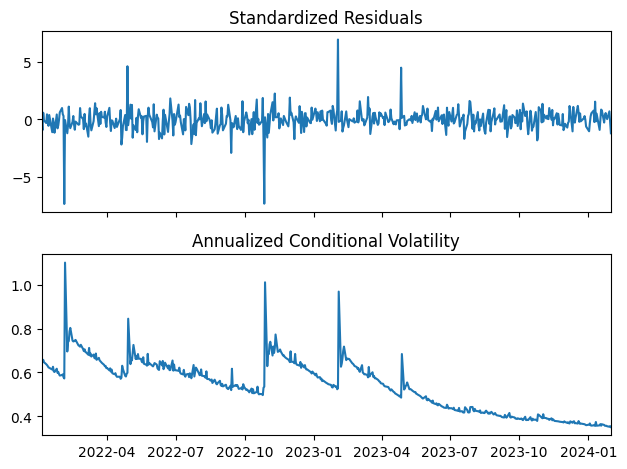

In [ ]:
# Plot standardized residuals and conditional volatility
plt.figure(figsize=(12, 6))
best_model.plot(annualize='D')
plt.tight_layout()
plt.show()

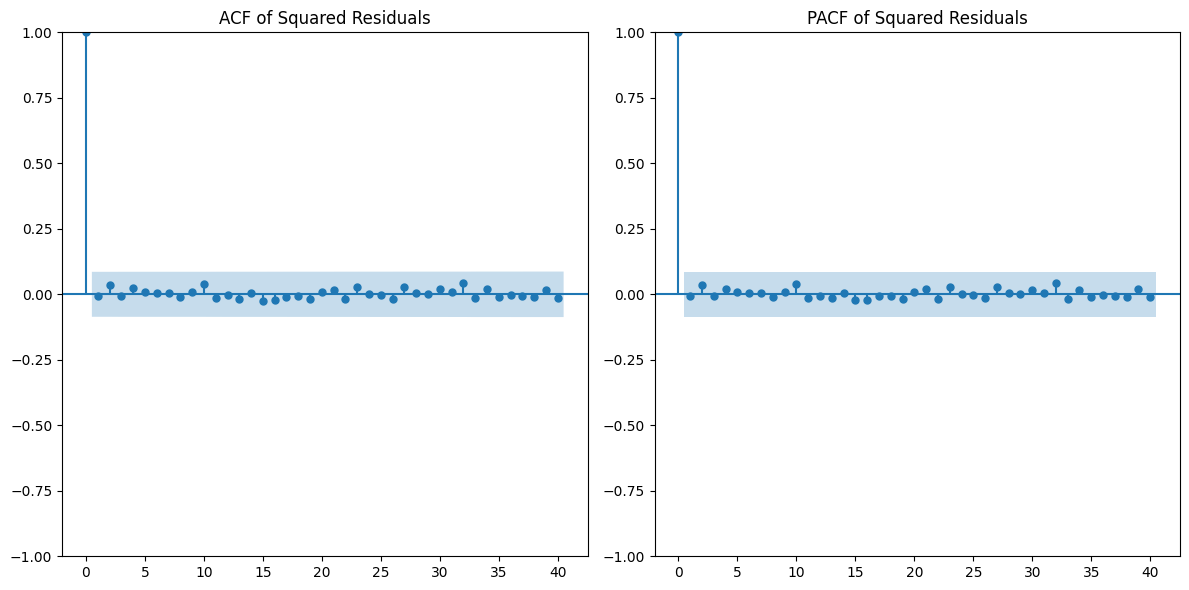

In [ ]:
# Plot ACF and PACF of squared residuals
plt.figure(figsize=(12, 6))
plt.subplot(121)
sm.graphics.tsa.plot_acf(best_model.resid**2, lags=40, ax=plt.gca())
plt.title('ACF of Squared Residuals')

plt.subplot(122)
sm.graphics.tsa.plot_pacf(best_model.resid**2, lags=40, ax=plt.gca())
plt.title('PACF of Squared Residuals')

plt.tight_layout()
plt.show()

In [ ]:
# Forecast volatility for the next n periods
n_periods = 20

forecast = best_model.forecast(start=returns.index[-1], horizon=n_periods)

# Display the forecasted volatility
print(forecast.variance.iloc[-1])

h.01    0.000519
h.02    0.000511
h.03    0.000514
h.04    0.000518
h.05    0.000522
h.06    0.000529
h.07    0.000531
h.08    0.000535
h.09    0.000539
h.10    0.000543
h.11    0.000547
h.12    0.000551
h.13    0.000555
h.14    0.000559
h.15    0.000563
h.16    0.000566
h.17    0.000570
h.18    0.000574
h.19    0.000578
h.20    0.000581
Name: 2024-01-31 00:00:00, dtype: float64


In [ ]:
# Plot the forecasted volatility for the best model with scatter points
plt.figure(figsize=(12, 6))

# Plot the line
plt.plot(forecasted_dates, np.sqrt(forecast.variance.iloc[-1]), label='Forecasted Volatility', color='blue')

# Mark the points with scatter points
plt.scatter(forecasted_dates, np.sqrt(forecast.variance.iloc[-1]), color='red', label='Volatility Points')

plt.title('Forecasted Volatility for the Best Model')
plt.xlabel('Date')
plt.ylabel('Volatility')

# Set x-axis ticks to display all business days
plt.xticks(forecast, rotation=45, ha="right")

# Show legend
plt.legend()

plt.show()

NameError: name 'forecasted_dates' is not defined

<Figure size 1200x600 with 0 Axes>

# Long Short Day trading:

A long position is when a trader **buys an asset with the expectation that its price will increase in the future**. The goal of a long trade is to buy low and sell high, profiting from the difference between the purchase price and the sale price.

On the other hand, a short position is when a **trader sells an asset with the expectation that its price will decrease in the future.** The goal of a short trade is to sell high and buy low, profiting from the difference between the sale price and the purchase price.

* if predicted > prev close, buy and sell at end of day

* if predicted < prev close, sell and buy at end of day

In [ ]:
amount = 1000000
signal = 0
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []

for i in range(len(results)):
    if results['Predicted'][i] > results['Actual'][i-1]:
        action.append('Buy at Open')
        stocks = int(amount/results['Open'][i])
        balance = int(amount%results['Close'][i])
        portfolio = stocks * results ['Open'][i]
        print(i,'Buy at Open',round(portfolio,2),stocks,round(balance,2))


        action.append('Sell at End')
        portfolio = stocks * results['Close'][i]
        signal = 0
        stocks = 0
        amount = balance + portfolio
        portfolio = 0
        balance = 0
        print(i,'Sell at Close',round(amount,2),balance)
        Amount.append(amount)

    else:
        action.append('Sell at Open')
        stocks = int(amount/results['Open'][i])
        balance = int(amount%results['Close'][i])
        portfolio = stocks * results ['Open'][i]
        print(i,'Sell at Open',round(portfolio,2),'-',stocks,round(balance,2))


        action.append('Buy at Close')
        portfolio = stocks * results['Close'][i]
        signal = 0
        stocks = 0
        amount = balance + portfolio
        portfolio = 0
        balance = 0
        print(i,'Buy Back at Close',round(amount,2),balance)
        Amount.append(amount)
    print('\n')


TypeError: object of type 'ARCHModelResult' has no len()

In [ ]:
results['Amount'] = list(Amount)

In [ ]:
results['Returns'] = results['Amount'].pct_change()

In [ ]:
results.tail()

#### RMSE Value of META

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(results['Actual'], results['Predicted']))
rms

In [ ]:
Profit = (Amount[-1])/1000000
print('Invested: 1000000$')
print('Final Amount:',Amount[-1],'$')
#print ('Profit_Percent:',Profit*100,'%')
Profit =Amount[-1] -  1000000
pct_Profit = (Profit/1000000)*100
print("Profit percentage: ", pct_Profit, "%")